In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/sinai_synthetic_data.csv')

# Display information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2177 non-null   float64
 1   comorbidity                       2177 non-null   int64  
 2   sumComorbidities                  2177 non-null   float64
 3   sum_contact_attempts_calc         2177 non-null   float64
 4   day_readmit                       2177 non-null   float64
 5   total_time_spent                  2177 non-null   float64
 6   contact_attempts                  2177 non-null   float64
 7   durationNum                       2177 non-null   float64
 8   new_patient_1                     2177 non-null   int64  
 9   new_patient_2                     2177 non-null   int64  
 10  new_patient_3                     2177 non-null   int64  
 11  race_black african american       2177 non-null   int64  
 12  race_h

In [3]:
# Filter out 4 patients
data = data[data['day_readmit'] != 2.0]
    
data.head()

,age,comorbidity,sumComorbidities,sum_contact_attempts_calc,day_readmit,total_time_spent,contact_attempts,durationNum,new_patient_1,new_patient_2,...,healthedneeds_0.0,healthedneeds_1.0,sdoh_yesno_0.0,sdoh_yesno_1.0,any_unmet_needs_0.0,any_unmet_needs_1.0,referrals_yesno_0.0,referrals_yesno_1.0,month_followup_0.0,month_followup_1.0
0,66.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50.0,0,0.0,0.0,1.0,26.0,3.0,11.0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,61.0,1,1.0,0.0,0.0,65.0,4.0,193.0,0,1,...,1,0,0,1,1,0,1,0,0,1
3,59.0,0,0.0,0.0,0.0,5.0,4.0,11.0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,73.0,0,0.0,0.0,0.0,26.0,3.0,11.0,1,0,...,1,0,0,1,1,0,0,1,1,0


In [4]:
# Grouping the features into different arrays:

Tracking = ['new_patient_1','new_patient_2','new_patient_3']
Contact =['sum_contact_attempts_calc','durationNum','spoke_patient_yes','sumContacts_1 call','sumContacts_2 calls','sumContacts_3 calls','sumContacts_4+','sumContacts_no calls']
Demographics = ['age', 'comorbidity','sumComorbidities','race_black african american','race_hispanic','race_other','language_non english','sex_gender_female','hypertension_yes','diabetes_yes','asthma_x_no','type_sw_referral_ed','type_sw_referral_high risk admit','type_sw_referral_other','health_insurance_na','health_insurance_private','health_insurance_public','health_insurance_uninsured']
Social_Determinant = ['sdoh_pcp_0.0','sdoh_pcp_1.0','sdoh_ins_0.0','sdoh_ins_1.0','sdoh_housing_0.0'
                         ,'sdoh_housing2_0.0','food_security_0.0','food_security_1.0','sdoh_util_0.0'
                         ,'sdoh_util_1.0','sdoh_trans_0.0','sdoh_trans_1.0','sdoh_employ_1.0','sdoh_employ_4.0'
                         ,'sdoh_dv_1.0','hiv_test_interest_1.0','covid_vax_signup_1.0','sdoh_diabetes_1.0','sdoh_asthma1_1.0'
                         ,'sdoh_alc_1.0','sdoh_alc_3.0','sdoh_alc_na','sdoh_substance_1.0','sdoh_substance_2.0','sdoh_emotional_1.0'
                         ,'sdoh_emotional_2.0','sdoh_emotional_na','healthedneeds_0.0','healthedneeds_1.0','sdoh_yesno_0.0','sdoh_yesno_1.0'
                         ,'any_unmet_needs_0.0','any_unmet_needs_1.0','referrals_yesno_0.0','referrals_yesno_1.0']
Followup=['total_time_spent','contact_attempts','month_followup_0.0','month_followup_1.0']

In [5]:
# Filter out 4 patients
data = data[data['day_readmit'] != 2.0]
    
data.head()

,age,comorbidity,sumComorbidities,sum_contact_attempts_calc,day_readmit,total_time_spent,contact_attempts,durationNum,new_patient_1,new_patient_2,...,healthedneeds_0.0,healthedneeds_1.0,sdoh_yesno_0.0,sdoh_yesno_1.0,any_unmet_needs_0.0,any_unmet_needs_1.0,referrals_yesno_0.0,referrals_yesno_1.0,month_followup_0.0,month_followup_1.0
0,66.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50.0,0,0.0,0.0,1.0,26.0,3.0,11.0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,61.0,1,1.0,0.0,0.0,65.0,4.0,193.0,0,1,...,1,0,0,1,1,0,1,0,0,1
3,59.0,0,0.0,0.0,0.0,5.0,4.0,11.0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,73.0,0,0.0,0.0,0.0,26.0,3.0,11.0,1,0,...,1,0,0,1,1,0,0,1,1,0


In [6]:
# Define the target variable and features
y = data['day_readmit']
X = data.drop('day_readmit', axis=1)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)


In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')  


print("Accuracy:", np.mean(scores))

Accuracy: 0.7685269346893373


In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from cross-validation
y_pred = cross_val_predict(model, X, y, cv=cv)

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1645
         1.0       0.36      0.30      0.33       528

    accuracy                           0.70      2173
   macro avg       0.58      0.57      0.57      2173
weighted avg       0.68      0.70      0.69      2173

Confusion Matrix:
 [[1370  275]
 [ 371  157]]


ROC AUC: 0.61


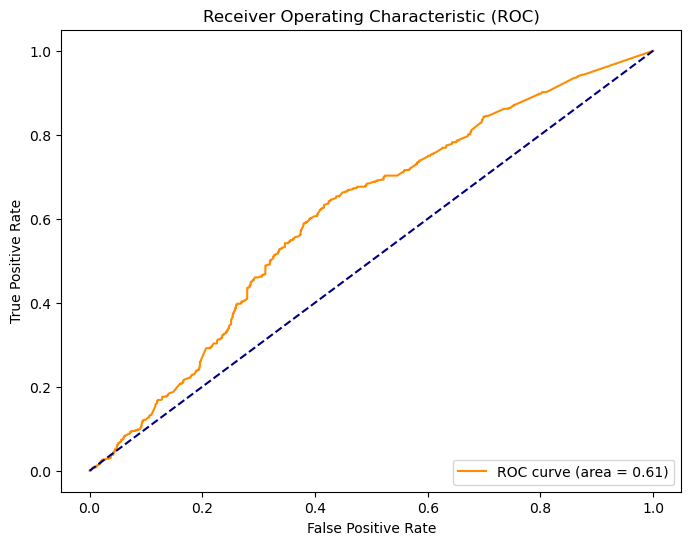

In [25]:
# Get probability estimates
y_probas = cross_val_predict(model, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Demographics Only

In [14]:
columns_to_drop = Tracking + Contact + Social_Determinant + Followup

rf_demo_df = data.drop(columns=columns_to_drop)

In [15]:
rf_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2176
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2173 non-null   float64
 1   comorbidity                       2173 non-null   int64  
 2   sumComorbidities                  2173 non-null   float64
 3   day_readmit                       2173 non-null   float64
 4   race_black african american       2173 non-null   int64  
 5   race_hispanic                     2173 non-null   int64  
 6   race_other                        2173 non-null   int64  
 7   language_non english              2173 non-null   int64  
 8   sex_gender_female                 2173 non-null   int64  
 9   hypertension_yes                  2173 non-null   int64  
 10  diabetes_yes                      2173 non-null   int64  
 11  asthma_x_no                       2173 non-null   int64  
 12  engaged_yes

In [18]:
# Define the target variable and features
y = rf_demo_df['day_readmit']
X = rf_demo_df.drop('day_readmit', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

# Initialize the RandomForestClassifier
demo_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(demo_model, X, y, cv=cv, scoring='accuracy')  


print("Accuracy:", np.mean(scores))

Accuracy: 0.7027067111605486


In [19]:
# Get predictions from cross-validation
y_pred = cross_val_predict(demo_model, X, y, cv=cv)

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1645
         1.0       0.36      0.30      0.33       528

    accuracy                           0.70      2173
   macro avg       0.58      0.57      0.57      2173
weighted avg       0.68      0.70      0.69      2173

Confusion Matrix:
 [[1370  275]
 [ 371  157]]


## Demopgraphics + CHW

In [27]:
columns_to_drop = Tracking + Social_Determinant + Followup

demo_CHW_rf = data.drop(columns=columns_to_drop)

In [28]:
demo_CHW_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2176
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2173 non-null   float64
 1   comorbidity                       2173 non-null   int64  
 2   sumComorbidities                  2173 non-null   float64
 3   sum_contact_attempts_calc         2173 non-null   float64
 4   day_readmit                       2173 non-null   float64
 5   durationNum                       2173 non-null   float64
 6   race_black african american       2173 non-null   int64  
 7   race_hispanic                     2173 non-null   int64  
 8   race_other                        2173 non-null   int64  
 9   language_non english              2173 non-null   int64  
 10  sex_gender_female                 2173 non-null   int64  
 11  hypertension_yes                  2173 non-null   int64  
 12  diabetes_ye

In [29]:
# Define the target variable and features
y = demo_CHW_rf['day_readmit']
X = demo_CHW_rf.drop('day_readmit', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

# Initialize the RandomForestClassifier
demo_CHW_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(demo_CHW_model, X, y, cv=cv, scoring='accuracy')  


print("Accuracy:", np.mean(scores))

Accuracy: 0.738601620848562


In [30]:
# Get predictions from cross-validation
y_pred = cross_val_predict(demo_CHW_model, X, y, cv=cv)

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84      1645
         1.0       0.44      0.27      0.33       528

    accuracy                           0.74      2173
   macro avg       0.61      0.58      0.58      2173
weighted avg       0.71      0.74      0.71      2173

Confusion Matrix:
 [[1464  181]
 [ 387  141]]


ROC AUC: 0.64


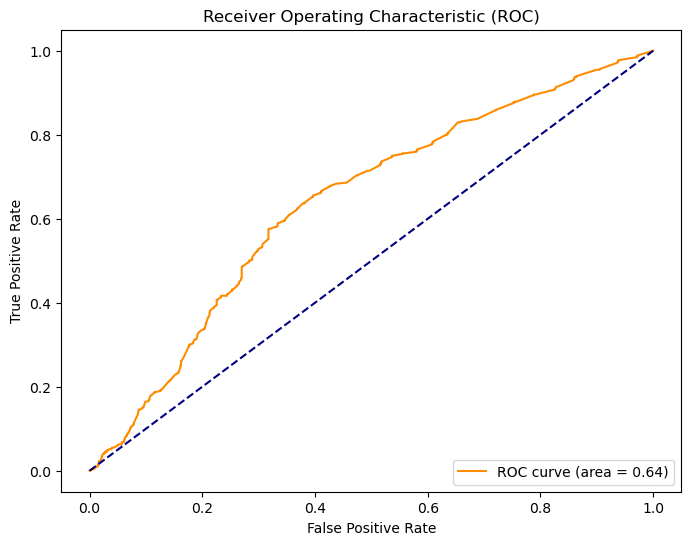

In [31]:
# Get probability estimates
y_probas = cross_val_predict(demo_CHW_model, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Demographics + SDOH

In [34]:
columns_to_drop = Tracking + Contact + Followup

demo_SDOH_rf = data.drop(columns=columns_to_drop)
demo_SDOH_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2176
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2173 non-null   float64
 1   comorbidity                       2173 non-null   int64  
 2   sumComorbidities                  2173 non-null   float64
 3   day_readmit                       2173 non-null   float64
 4   race_black african american       2173 non-null   int64  
 5   race_hispanic                     2173 non-null   int64  
 6   race_other                        2173 non-null   int64  
 7   language_non english              2173 non-null   int64  
 8   sex_gender_female                 2173 non-null   int64  
 9   hypertension_yes                  2173 non-null   int64  
 10  diabetes_yes                      2173 non-null   int64  
 11  asthma_x_no                       2173 non-null   int64  
 12  engaged_yes

In [38]:
# Define the target variable and features
y = demo_SDOH_rf['day_readmit']
X = demo_SDOH_rf.drop('day_readmit', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

# Initialize the RandomForestClassifier
demo_SDOH_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(demo_SDOH_model, X, y, cv=cv, scoring='accuracy')  

print("Accuracy:", np.mean(scores))

Accuracy: 0.7114518777477621


In [40]:
# Get predictions from cross-validation
y_pred = cross_val_predict(demo_SDOH_model, X, y, cv=cv)

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82      1645
         1.0       0.37      0.26      0.30       528

    accuracy                           0.71      2173
   macro avg       0.57      0.56      0.56      2173
weighted avg       0.68      0.71      0.69      2173

Confusion Matrix:
 [[1411  234]
 [ 393  135]]


ROC AUC: 0.58


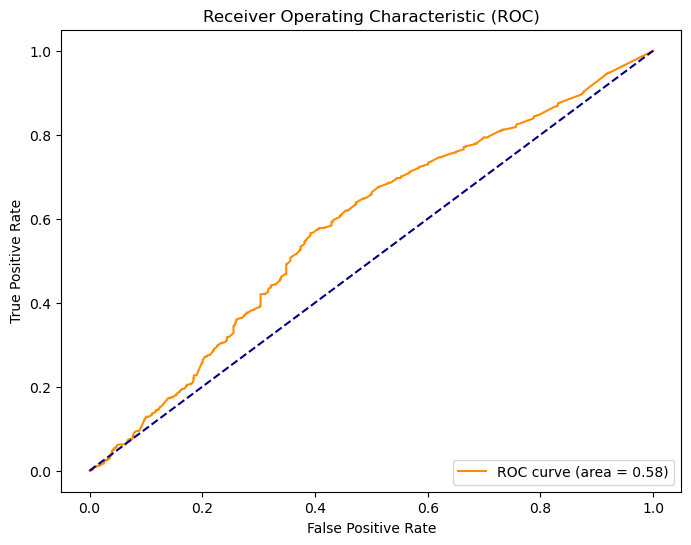

In [41]:
# Get probability estimates
y_probas = cross_val_predict(demo_SDOH_model, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()